
===================== DATA LOADING AND INITIAL EXPLORATION =====================

Dataset dimensions: 541,802 rows × 22 columns
Number of unique games: 156
Number of unique players: 376
Number of unique teams: 14

Top 10 event types in the dataset:
eventname
pass               128975
lpr                107131
reception           99396
carry               33914
controlledexit      28923
puckprotection      23417
block               17931
faceoff             16946
shot                16348
controlledentry     12726
Name: count, dtype: int64

========================= IDENTIFYING PASS CONNECTIONS =========================

Analyzing a sample of 5 games
Found 3,037 pass connections across 5 games
Average time between pass and reception: 0.94 seconds

Sample of pass connections (first 5):
   gameid  period  sender_id  receiver_id     pass_x     pass_y  reception_x  reception_y  time_diff  pass_zone reception_zone
0   64765       1      23843       367178  -0.197929   0.250000   -23.836166 

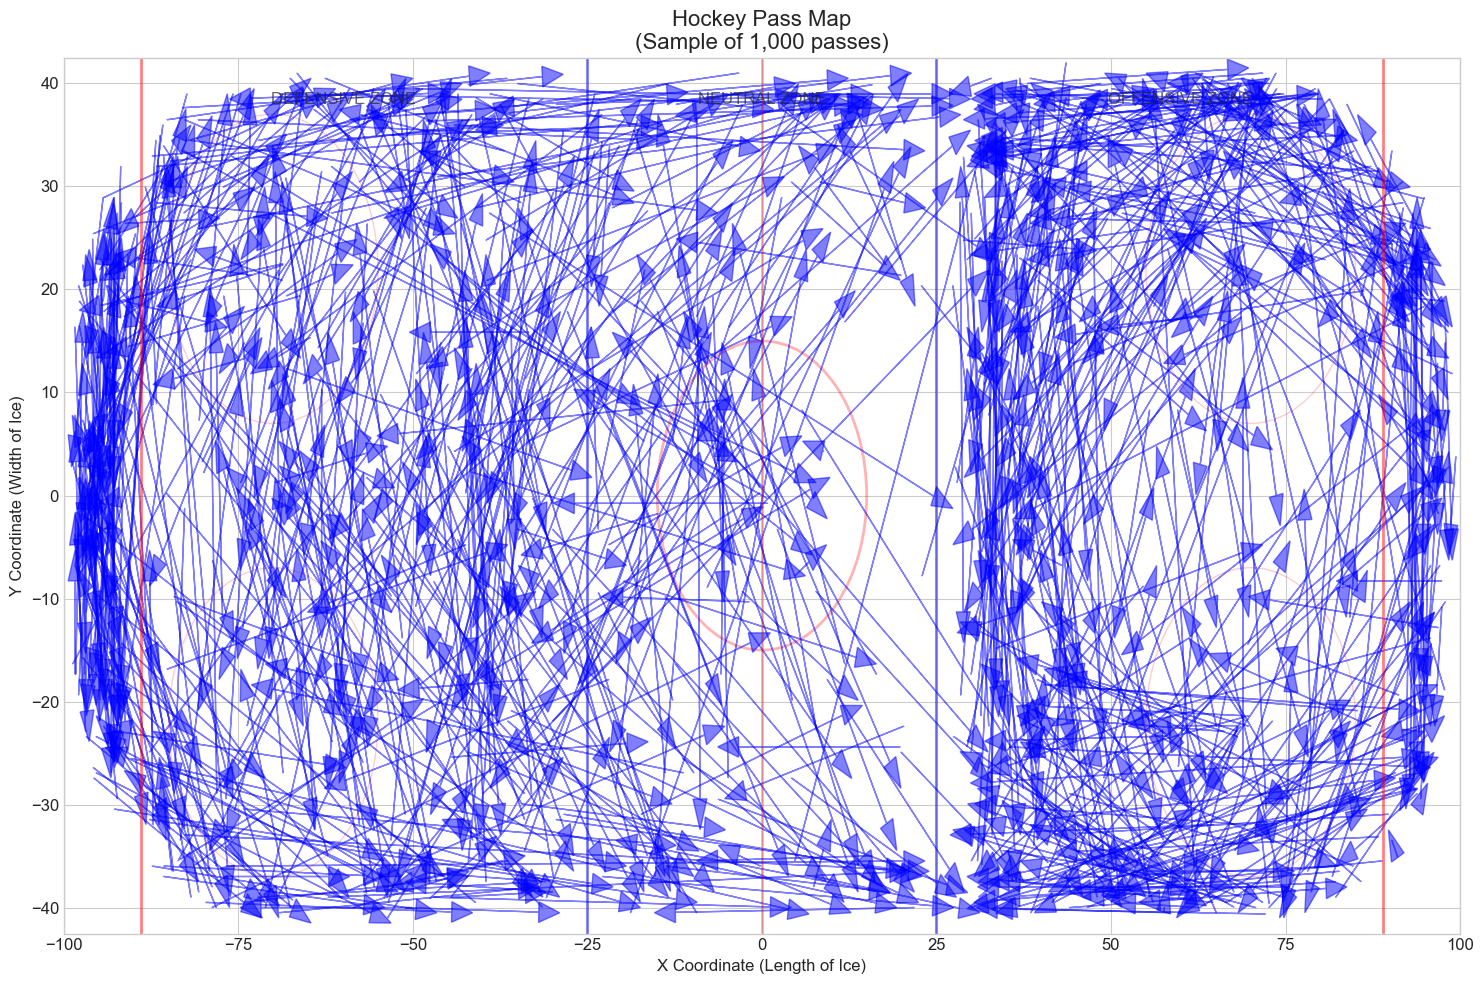


============================ TEAM PASSING NETWORKS =============================


Team 628 Passing Network

Analyzing team 628 with 652 pass connections
Team passing network saved to passing_network_results/team_628_passing_network.png


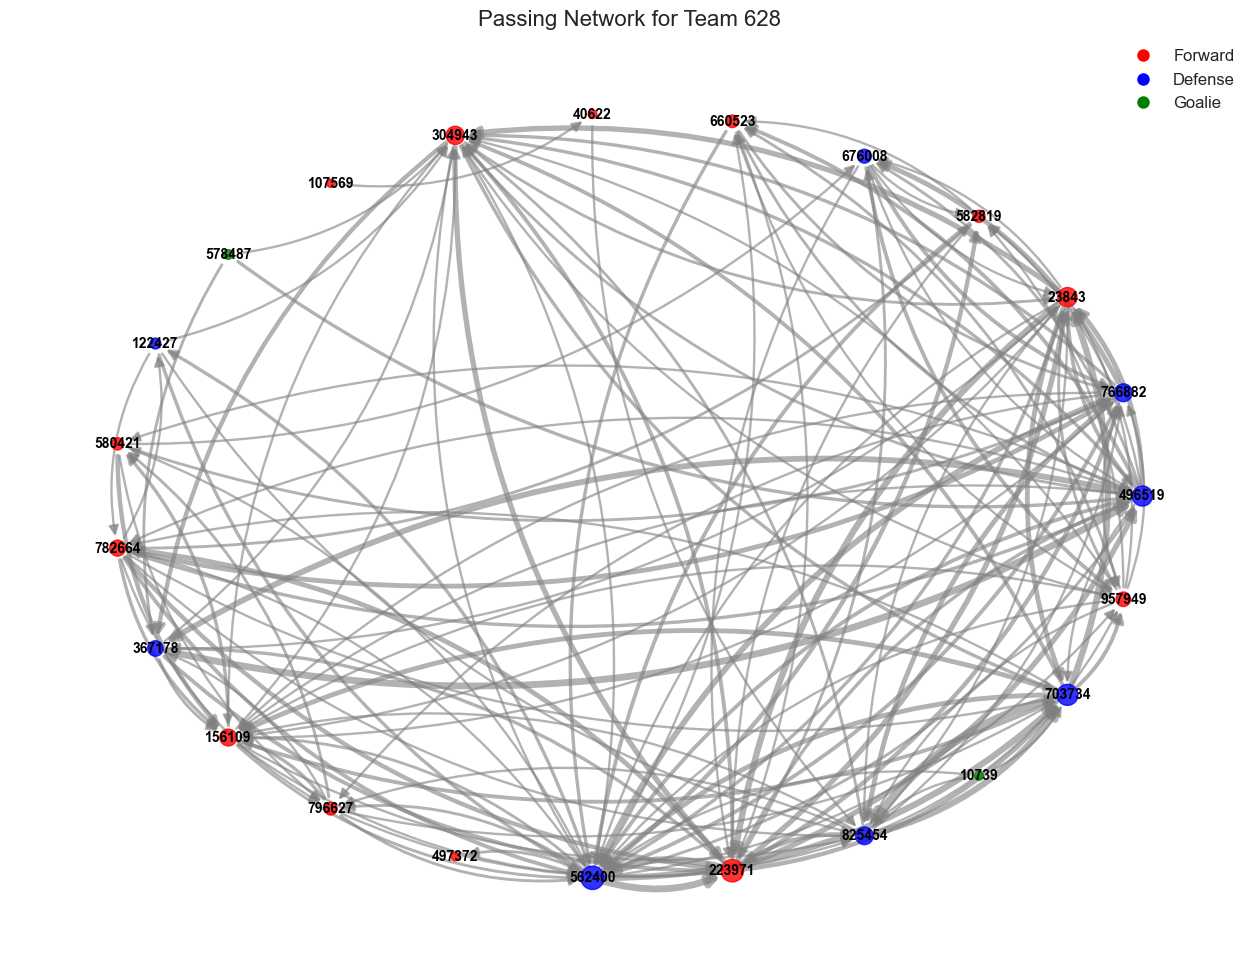


Key Player Analysis:

Top 5 players by total pass involvement:
 PlayerID Position  Passes_Sent  Passes_Received  Total_Passes  Out_Degree  In_Degree  Betweenness
   562400        D           62               64           126    0.681818   0.636364     0.136869
   223971        F           60               56           116    0.454545   0.454545     0.011544
   703734        D           50               50           100    0.318182   0.454545     0.013564
   496519        D           47               43            90    0.545455   0.409091     0.042208
    23843        F           39               42            81    0.363636   0.454545     0.063384
Player metrics saved to passing_network_results/team_628_player_metrics.csv

Team 503 Passing Network

Analyzing team 503 with 670 pass connections
Team passing network saved to passing_network_results/team_503_passing_network.png


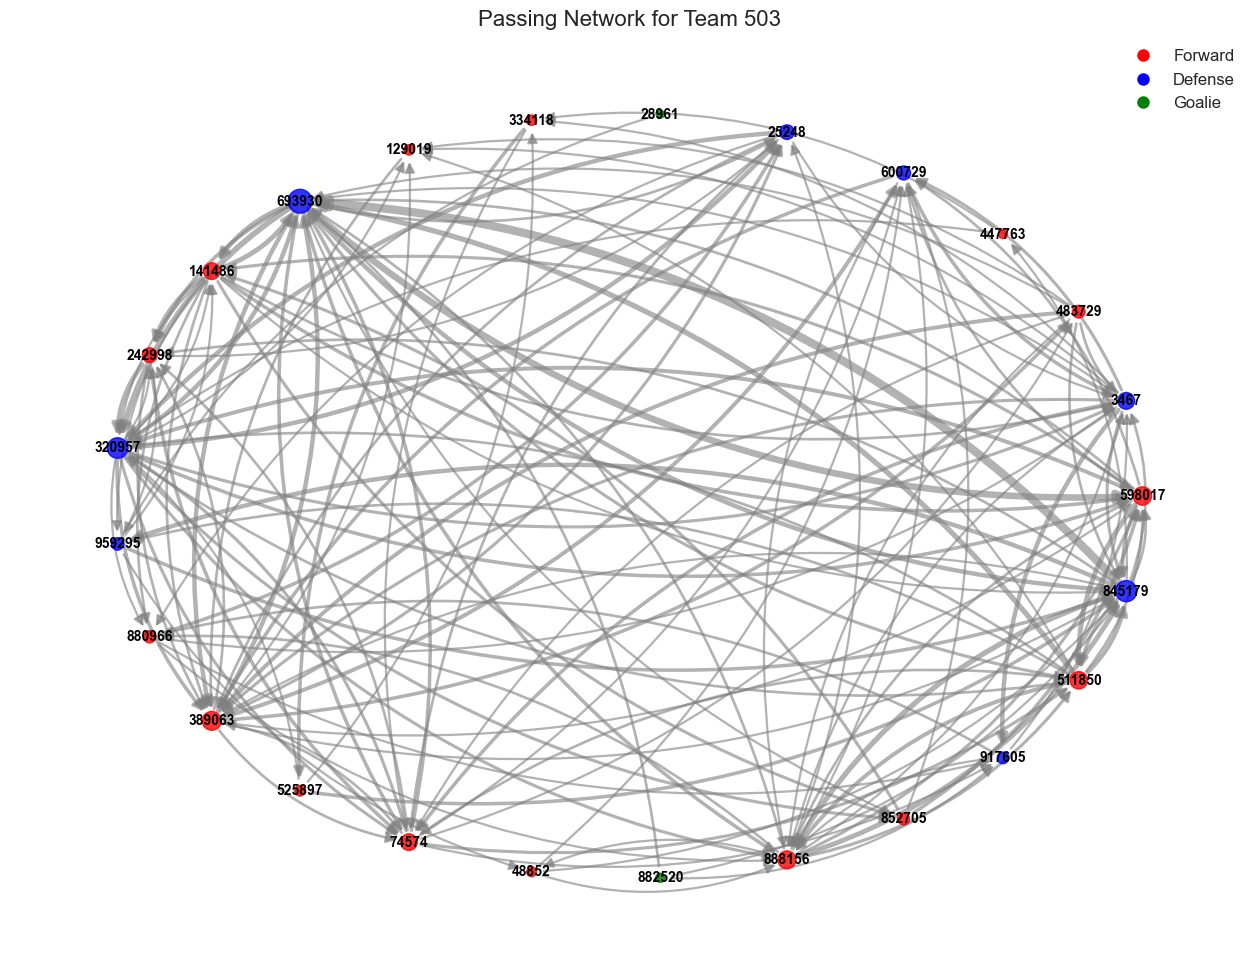


Key Player Analysis:

Top 5 players by total pass involvement:
 PlayerID Position  Passes_Sent  Passes_Received  Total_Passes  Out_Degree  In_Degree  Betweenness
   693930        D           67               65           132    0.458333   0.458333     0.042240
   845179        D           50               51           101    0.375000   0.500000     0.101842
   320957        D           51               44            95    0.541667   0.375000     0.091727
   389063        F           34               44            78    0.375000   0.458333     0.084511
   598017        F           31               42            73    0.291667   0.375000     0.040459
Player metrics saved to passing_network_results/team_503_player_metrics.csv

Team 524 Passing Network

Analyzing team 524 with 866 pass connections
Team passing network saved to passing_network_results/team_524_passing_network.png


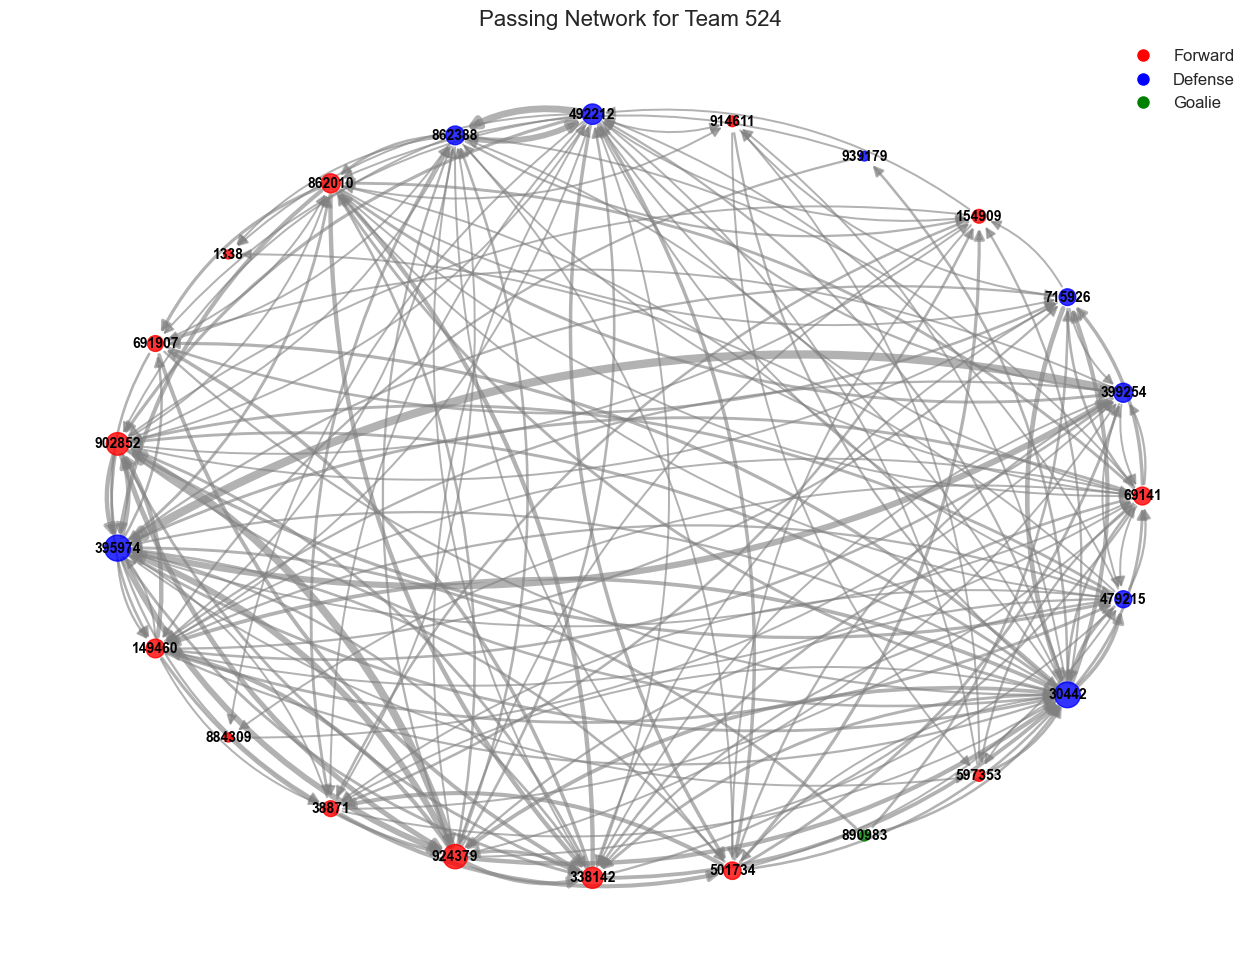


Key Player Analysis:

Top 5 players by total pass involvement:
 PlayerID Position  Passes_Sent  Passes_Received  Total_Passes  Out_Degree  In_Degree  Betweenness
   395974        D           70               90           160    0.500000   0.590909     0.016306
    30442        D           79               77           156    0.818182   0.681818     0.095960
   924379        F           81               57           138    0.454545   0.409091     0.005592
   902852        F           51               66           117    0.500000   0.409091     0.022258
   338142        F           45               55           100    0.363636   0.500000     0.013600
Player metrics saved to passing_network_results/team_524_player_metrics.csv

Team 869 Passing Network

Analyzing team 869 with 295 pass connections
Team passing network saved to passing_network_results/team_869_passing_network.png


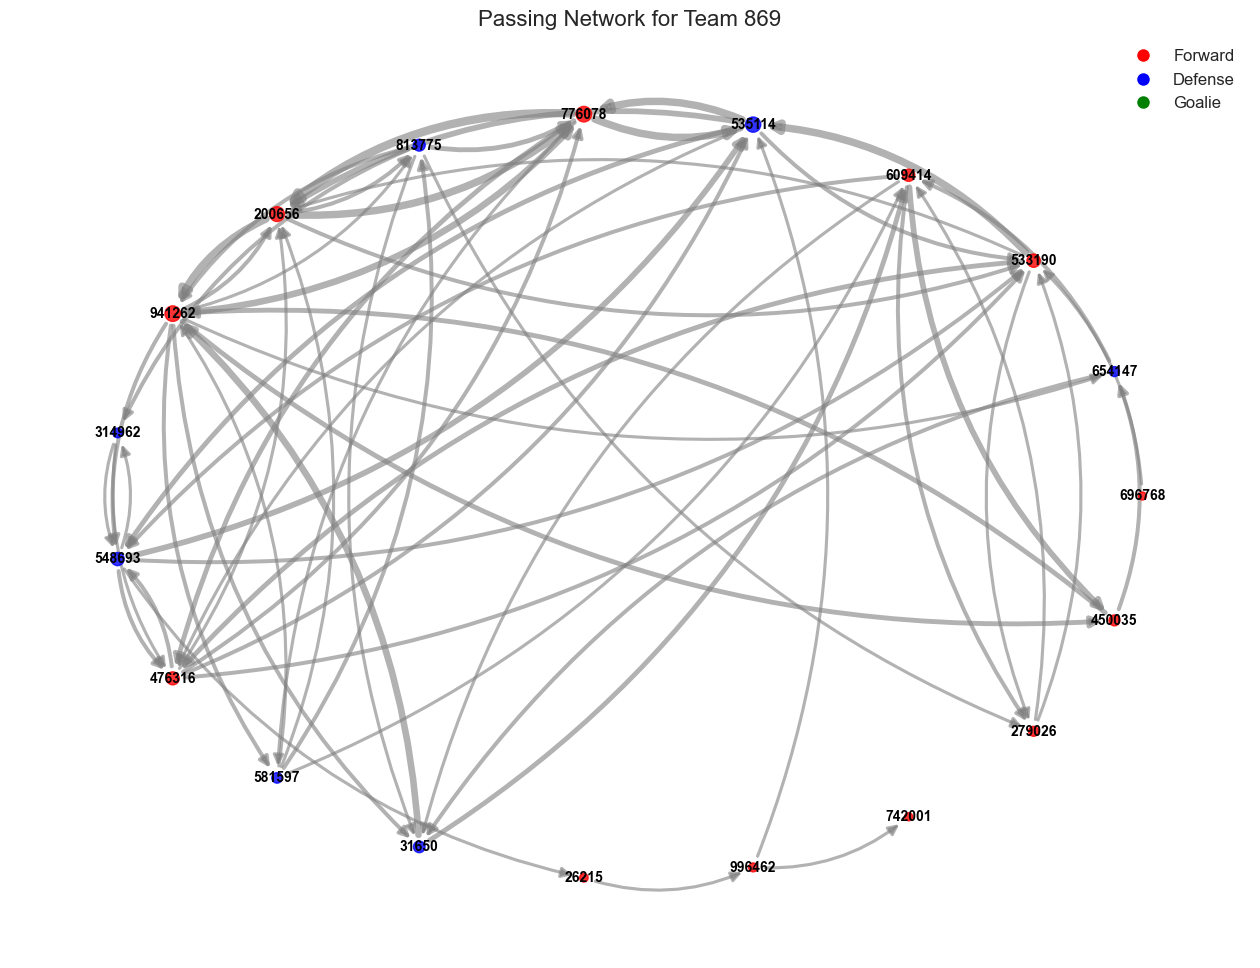


Key Player Analysis:

Top 5 players by total pass involvement:
 PlayerID Position  Passes_Sent  Passes_Received  Total_Passes  Out_Degree  In_Degree  Betweenness
   776078        F           21               27            48    0.222222   0.277778     0.083333
   941262        F           26               22            48    0.444444   0.277778     0.145425
   535114        D           21               24            45    0.277778   0.277778     0.094771
   200656        F           20               22            42    0.222222   0.333333     0.070806
   533190        F           15               16            31    0.222222   0.333333     0.157407
Player metrics saved to passing_network_results/team_869_player_metrics.csv

Team 855 Passing Network

Analyzing team 855 with 204 pass connections
Team passing network saved to passing_network_results/team_855_passing_network.png


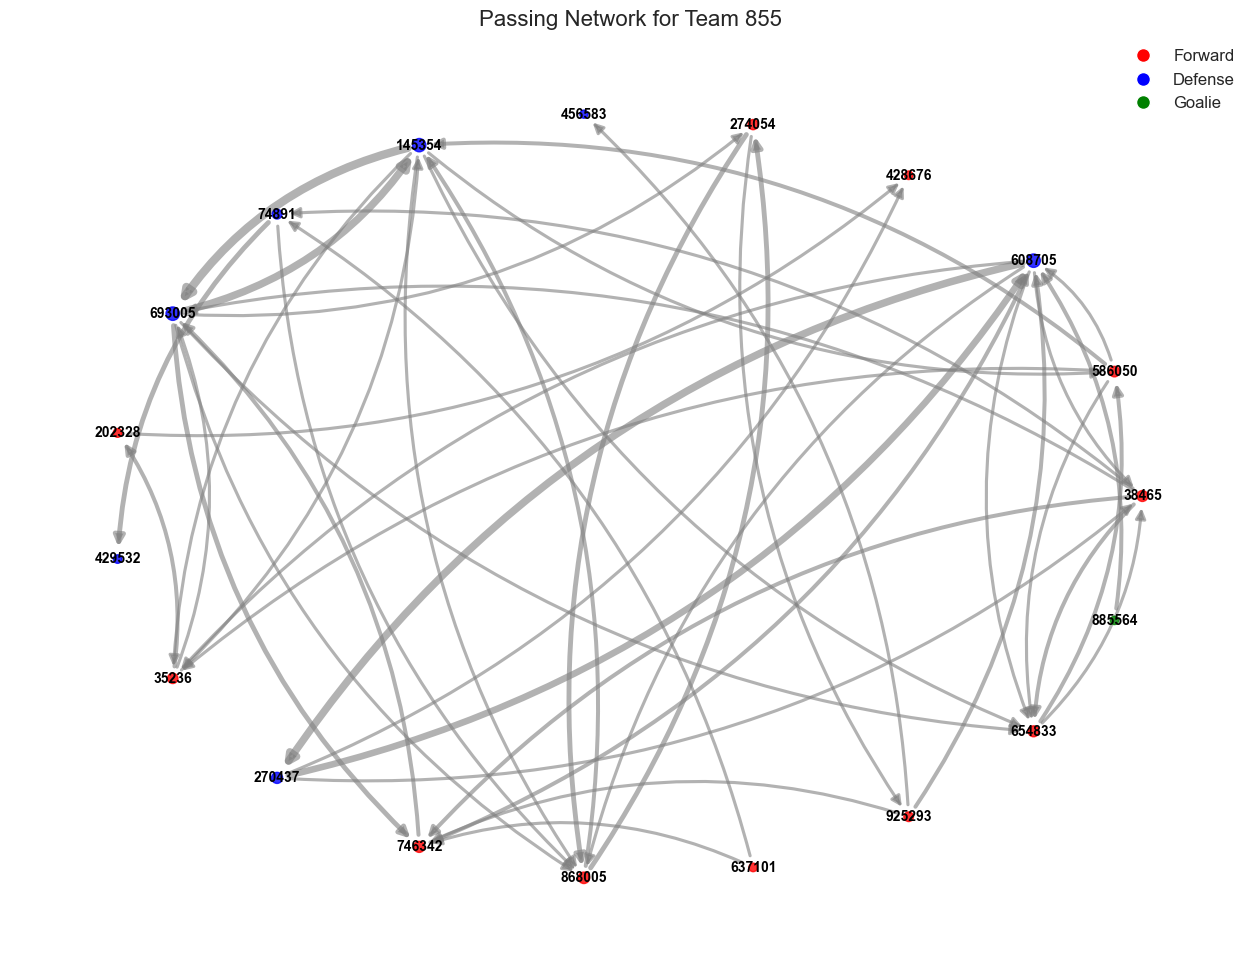


Key Player Analysis:

Top 5 players by total pass involvement:
 PlayerID Position  Passes_Sent  Passes_Received  Total_Passes  Out_Degree  In_Degree  Betweenness
   608705        D           15               17            32    0.277778   0.277778     0.210784
   693005        D           17               15            32    0.277778   0.222222     0.116013
   145354        D           16               15            31    0.277778   0.222222     0.094771
   868005        F            7               12            19    0.111111   0.277778     0.084967
   746342        F            6               11            17    0.111111   0.222222     0.059368
Player metrics saved to passing_network_results/team_855_player_metrics.csv

Team 825 Passing Network

Analyzing team 825 with 350 pass connections
Team passing network saved to passing_network_results/team_825_passing_network.png


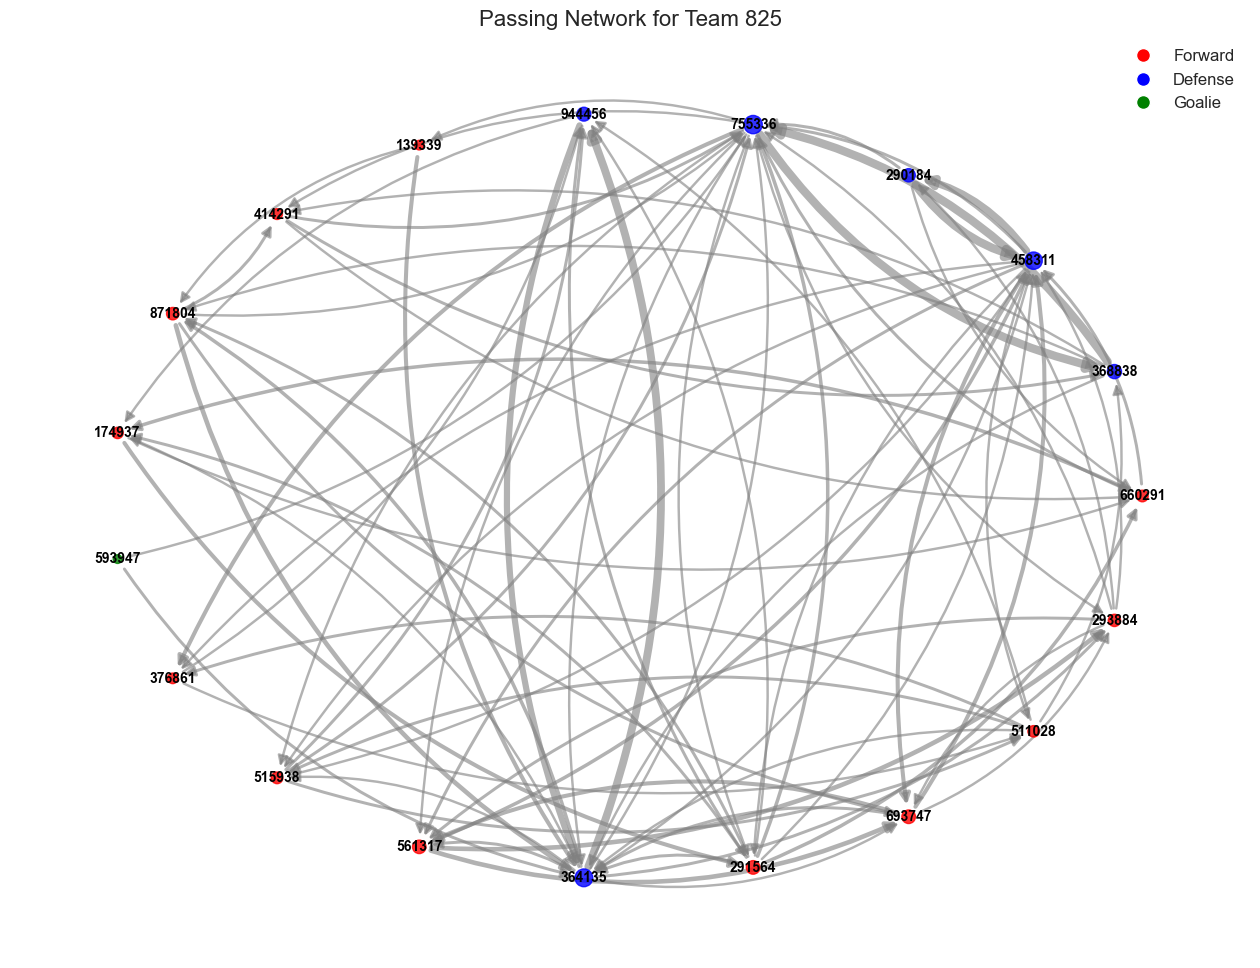


Key Player Analysis:

Top 5 players by total pass involvement:
 PlayerID Position  Passes_Sent  Passes_Received  Total_Passes  Out_Degree  In_Degree  Betweenness
   755336        D           35               37            72    0.555556   0.555556     0.303758
   364135        D           32               35            67    0.500000   0.500000     0.153159
   458311        D           30               33            63    0.444444   0.444444     0.235076
   368838        D           19               18            37    0.222222   0.166667     0.021242
   944456        D           14               21            35    0.166667   0.277778     0.019063
Player metrics saved to passing_network_results/team_825_player_metrics.csv

======================== ZONE-TO-ZONE PASSING ANALYSIS =========================

Zone-to-Zone Pass Counts:
reception_zone  Defensive  Neutral  Offensive  Total
pass_zone                                           
Defensive            1087      253         17   135

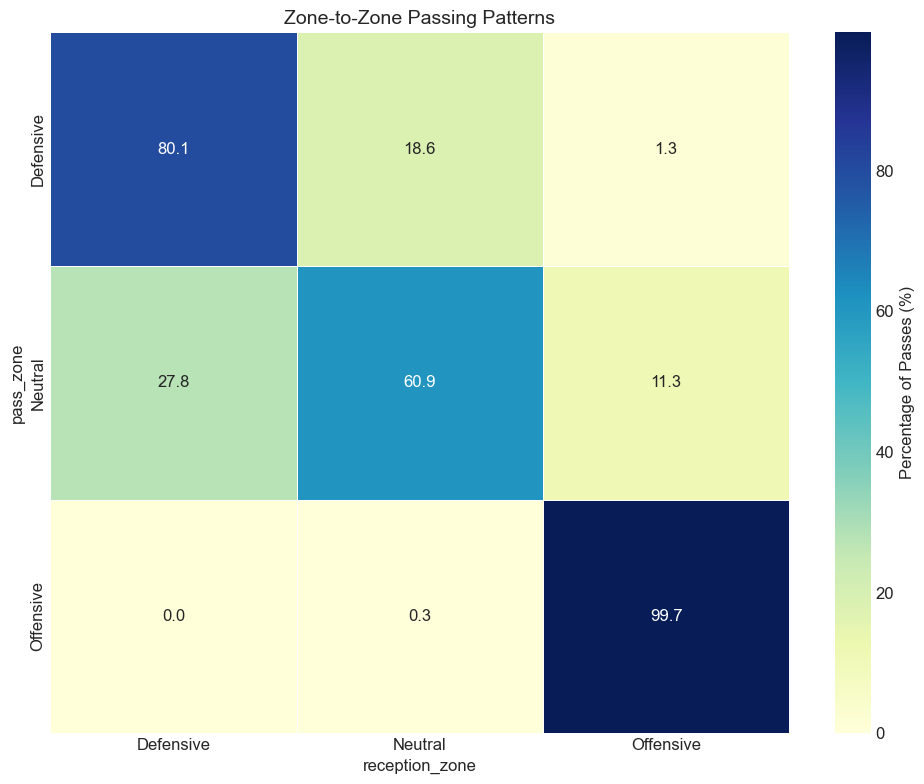

Zone passing flow diagram saved to passing_network_results/zone_passing_flow.png


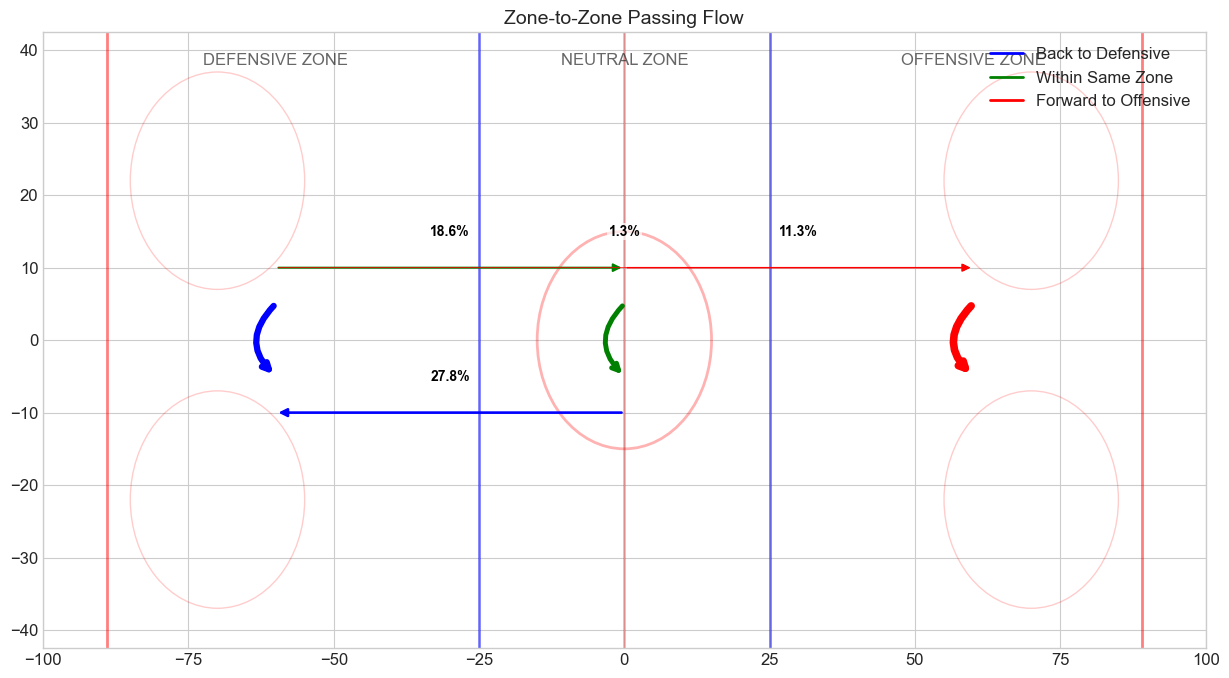

In [6]:
# =========================================================================
# HOCKEY PASSING NETWORK ANALYSIS - DETAILED VERSION
# =========================================================================
# This script analyzes passing networks in hockey data using the SportLogiq dataset.
# It's designed to be easy to follow with detailed comments and clear visualizations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import warnings
warnings.filterwarnings('ignore')

# Create output directory for our visualizations and results
output_dir = "passing_network_results"
os.makedirs(output_dir, exist_ok=True)

# ==========================================================================
# 1. HELPER FUNCTIONS - For printing and plotting
# ==========================================================================

def print_section(title):
    """Print a section header to make output more readable"""
    section_width = 80
    print("\n" + "=" * section_width)
    print(f" {title} ".center(section_width, "="))
    print("=" * section_width + "\n")

def plot_hockey_rink(ax=None):
    """
    Draw a simplified hockey rink on the given axes
    If no axes is provided, uses the current axes
    """
    if ax is None:
        ax = plt.gca()
    
    # Rink dimensions (standard NHL rink is 200 feet x 85 feet)
    # Our coordinates appear to be normalized to a -100 to 100 range on x-axis
    
    # Center line
    ax.axvline(x=0, color='red', linestyle='-', alpha=0.3, linewidth=2)
    
    # Blue lines
    ax.axvline(x=25, color='blue', linestyle='-', alpha=0.5, linewidth=2)
    ax.axvline(x=-25, color='blue', linestyle='-', alpha=0.5, linewidth=2)
    
    # Goal lines
    ax.axvline(x=89, color='red', linestyle='-', alpha=0.5, linewidth=2)
    ax.axvline(x=-89, color='red', linestyle='-', alpha=0.5, linewidth=2)
    
    # Center circle
    circle = plt.Circle((0, 0), 15, fill=False, color='red', alpha=0.3, linewidth=2)
    ax.add_patch(circle)
    
    # Faceoff circles (approximate positions)
    for x in [-70, 70]:
        for y in [-22, 22]:
            circle = plt.Circle((x, y), 15, fill=False, color='red', alpha=0.2, linewidth=1)
            ax.add_patch(circle)
    
    # Add zone labels
    ax.text(-60, 38, "DEFENSIVE ZONE", fontsize=12, ha='center', alpha=0.7)
    ax.text(0, 38, "NEUTRAL ZONE", fontsize=12, ha='center', alpha=0.7)
    ax.text(60, 38, "OFFENSIVE ZONE", fontsize=12, ha='center', alpha=0.7)
    
    # Set limits
    ax.set_xlim(-100, 100)
    ax.set_ylim(-42.5, 42.5)
    
    return ax

# ==========================================================================
# 2. DATA LOADING AND PREPARATION
# ==========================================================================

print_section("DATA LOADING AND INITIAL EXPLORATION")

# Load the data
file_path = 'C:/Users/16476/Downloads/Linhac24-25_Sportlogiq/Linhac24-25_Sportlogiq.csv'
data = pd.read_csv(file_path)

# Print basic dataset information
print(f"Dataset dimensions: {data.shape[0]:,} rows × {data.shape[1]} columns")
print(f"Number of unique games: {data['gameid'].nunique():,}")
print(f"Number of unique players: {data['playerid'].nunique():,}")
print(f"Number of unique teams: {data['teamid'].nunique()}")

# Look at event types in the data
event_counts = data['eventname'].value_counts()
print("\nTop 10 event types in the dataset:")
print(event_counts.head(10))

# ==========================================================================
# 3. IDENTIFYING PASSING CONNECTIONS
# ==========================================================================

print_section("IDENTIFYING PASS CONNECTIONS")

def identify_pass_connections(df, max_time_diff=2.5, sample_size=None):
    """
    Identify connections between passes and their receptions.
    
    Parameters:
    -----------
    df : DataFrame
        The hockey event data
    max_time_diff : float
        Maximum time difference (in seconds) between a pass and its reception
    sample_size : int or None
        Number of games to sample (None = use all games)
    
    Returns:
    --------
    DataFrame containing pass connections with sender and receiver information
    """
    # Start with a sample of games if requested
    if sample_size is not None:
        sampled_games = np.random.choice(df['gameid'].unique(), 
                                         size=min(sample_size, df['gameid'].nunique()), 
                                         replace=False)
        df = df[df['gameid'].isin(sampled_games)].copy()
        print(f"Analyzing a sample of {len(sampled_games)} games")
    else:
        print(f"Analyzing all {df['gameid'].nunique()} games")
        
    # Sort data by game, time and team
    df = df.sort_values(['gameid', 'compiledgametime', 'teamid'])
    
    # Initialize list to store connections
    connections = []
    
    # Process each game
    for game_id in df['gameid'].unique():
        # Filter data for this game
        game_data = df[df['gameid'] == game_id]
        
        # Find successful passes
        successful_passes = game_data[
            (game_data['eventname'] == 'pass') & 
            (game_data['outcome'] == 'successful')
        ]
        
        # For each successful pass, find the corresponding reception
        for _, pass_event in successful_passes.iterrows():
            # Look for receptions after this pass by the same team
            possible_receptions = game_data[
                (game_data['eventname'] == 'reception') &
                (game_data['teamid'] == pass_event['teamid']) &
                (game_data['compiledgametime'] > pass_event['compiledgametime']) &
                (game_data['compiledgametime'] <= pass_event['compiledgametime'] + max_time_diff)
            ]
            
            # If we found a reception, record the connection
            if len(possible_receptions) > 0:
                # Take the first reception (closest in time)
                reception = possible_receptions.iloc[0]
                
                connections.append({
                    'gameid': game_id,
                    'period': pass_event['period'],
                    'pass_time': pass_event['compiledgametime'],
                    'sender_id': pass_event['playerid'],
                    'sender_team': pass_event['teamid'],
                    'pass_position': pass_event['playerprimaryposition'],
                    'receiver_id': reception['playerid'],
                    'receiver_position': reception['playerprimaryposition'],
                    'time_diff': reception['compiledgametime'] - pass_event['compiledgametime'],
                    'pass_type': pass_event['type'] if 'type' in pass_event else 'unknown',
                    'manpower': pass_event['manpowersituation'],
                    'score_diff': pass_event['scoredifferential'],
                    'pass_x': pass_event['xadjcoord'],
                    'pass_y': pass_event['yadjcoord'],
                    'reception_x': reception['xadjcoord'],
                    'reception_y': reception['yadjcoord']
                })
    
    # Convert to DataFrame
    connections_df = pd.DataFrame(connections)
    
    # Add zone information
    connections_df['pass_zone'] = connections_df['pass_x'].apply(
        lambda x: "Defensive" if x < -25 else ("Offensive" if x > 25 else "Neutral")
    )
    connections_df['reception_zone'] = connections_df['reception_x'].apply(
        lambda x: "Defensive" if x < -25 else ("Offensive" if x > 25 else "Neutral")
    )
    
    print(f"Found {len(connections_df):,} pass connections across {connections_df['gameid'].nunique()} games")
    print(f"Average time between pass and reception: {connections_df['time_diff'].mean():.2f} seconds")
    
    return connections_df

# Identify pass connections
# For demonstration purposes, we'll use a sample of games (adjust as needed)
connections = identify_pass_connections(data, sample_size=5)

# Display the first few connections
print("\nSample of pass connections (first 5):")
display_cols = ['gameid', 'period', 'sender_id', 'receiver_id', 'pass_x', 'pass_y', 
                'reception_x', 'reception_y', 'time_diff', 'pass_zone', 'reception_zone']
print(connections[display_cols].head().to_string())

# Save connections for later use
connections.to_csv(f"{output_dir}/pass_connections.csv", index=False)
print(f"\nPass connections saved to {output_dir}/pass_connections.csv")

# ==========================================================================
# 4. VISUALIZING PASS MAP
# ==========================================================================

print_section("VISUALIZING OVERALL PASS MAP")

def plot_pass_map(connections, max_passes=1000, title=None):
    """
    Plot a map of passes on a hockey rink.
    
    Parameters:
    -----------
    connections : DataFrame
        DataFrame containing pass connection information
    max_passes : int
        Maximum number of passes to plot (to avoid overcrowding)
    title : str
        Optional title for the plot
    """
    # Sample passes if there are too many
    if len(connections) > max_passes:
        plot_connections = connections.sample(max_passes)
        subtitle = f"(Sample of {max_passes:,} passes)"
    else:
        plot_connections = connections
        subtitle = f"(All {len(connections):,} passes)"
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Draw the hockey rink
    plot_hockey_rink(ax)
    
    # Plot passes as arrows
    for _, conn in plot_connections.iterrows():
        ax.arrow(
            conn['pass_x'], conn['pass_y'],  # start
            conn['reception_x'] - conn['pass_x'],  # dx
            conn['reception_y'] - conn['pass_y'],  # dy
            head_width=2, head_length=3,
            fc='blue', ec='blue', alpha=0.5,
            length_includes_head=True
        )
    
    # Add title
    main_title = title if title else "Hockey Pass Map"
    plt.title(f"{main_title}\n{subtitle}", fontsize=16)
    
    # Add labels
    plt.xlabel('X Coordinate (Length of Ice)', fontsize=12)
    plt.ylabel('Y Coordinate (Width of Ice)', fontsize=12)
    
    # Save and show
    plt.tight_layout()
    filename = f"{output_dir}/overall_pass_map.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Overall pass map saved to {filename}")
    plt.show()

# Plot overall pass map
plot_pass_map(connections)

# ==========================================================================
# 5. TEAM PASSING NETWORKS
# ==========================================================================

print_section("TEAM PASSING NETWORKS")

def create_passing_network(connections, team_id, min_passes=2, include_positions=True):
    """
    Create a passing network visualization for a specific team.
    
    Parameters:
    -----------
    connections : DataFrame
        DataFrame containing pass connections
    team_id : int
        ID of the team to analyze
    min_passes : int
        Minimum number of passes between players to include
    include_positions : bool
        Whether to include player positions in the visualization
    
    Returns:
    --------
    G : NetworkX graph of the passing network
    """
    # Filter for the specified team
    team_connections = connections[connections['sender_team'] == team_id]
    
    if len(team_connections) == 0:
        print(f"No pass connections found for team {team_id}")
        return None
    
    print(f"\nAnalyzing team {team_id} with {len(team_connections):,} pass connections")
    
    # Count passes between each pair of players
    pass_counts = team_connections.groupby(['sender_id', 'receiver_id']).size().reset_index(name='passes')
    
    # Filter for minimum number of passes
    pass_counts = pass_counts[pass_counts['passes'] >= min_passes]
    
    if len(pass_counts) == 0:
        print(f"No player pairs with at least {min_passes} passes")
        return None
    
    # Get player positions if needed
    if include_positions:
        # Get sender positions
        sender_positions = team_connections.groupby('sender_id')['pass_position'].first().to_dict()
        # Get receiver positions
        receiver_positions = team_connections.groupby('receiver_id')['receiver_position'].first().to_dict()
        # Combine them (for players who might be in one dict but not the other)
        player_positions = {**sender_positions, **receiver_positions}
    
    # Create a graph
    G = nx.DiGraph()
    
    # Get all players
    all_players = set(pass_counts['sender_id']) | set(pass_counts['receiver_id'])
    
    # Add nodes for all players
    for player in all_players:
        # Count passes sent and received
        passes_sent = pass_counts[pass_counts['sender_id'] == player]['passes'].sum() if player in pass_counts['sender_id'].values else 0
        passes_received = pass_counts[pass_counts['receiver_id'] == player]['passes'].sum() if player in pass_counts['receiver_id'].values else 0
        
        # Player attributes
        node_attrs = {
            'sent': passes_sent,
            'received': passes_received,
            'total': passes_sent + passes_received
        }
        
        # Add position if available
        if include_positions and player in player_positions:
            node_attrs['position'] = player_positions[player]
        
        # Add the node
        G.add_node(player, **node_attrs)
    
    # Add edges (passes between players)
    for _, row in pass_counts.iterrows():
        G.add_edge(
            row['sender_id'],
            row['receiver_id'],
            weight=row['passes']
        )
    
    # Plot the network
    plt.figure(figsize=(16, 12))
    
    # Define node colors by position if available
    if include_positions:
        position_colors = {'F': 'red', 'D': 'blue', 'G': 'green'}
        node_colors = [position_colors.get(G.nodes[player].get('position', 'unknown'), 'gray') for player in G.nodes]
    else:
        node_colors = 'skyblue'
    
    # Calculate node sizes based on total passes (scaled for visibility)
    node_sizes = [30 + G.nodes[player]['total'] * 2 for player in G.nodes]
    
    # Use a layout that spreads nodes nicely
    # For hockey, a circular layout might work well to show the team structure
    pos = nx.circular_layout(G)
    
    # Draw the nodes
    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.8
    )
    
    # Draw the edges with width based on number of passes
    edge_weights = [G[u][v]['weight'] for u, v in G.edges]
    max_weight = max(edge_weights) if edge_weights else 1
    
    # Scale edge widths for better visibility
    scaled_weights = [1 + (w / max_weight) * 5 for w in edge_weights]
    
    edges = nx.draw_networkx_edges(
        G, pos,
        width=scaled_weights,
        edge_color='gray',
        alpha=0.6,
        arrowstyle='-|>',
        arrowsize=15,
        connectionstyle='arc3,rad=0.2'  # Curved edges
    )
    
    # Add labels with player IDs
    nx.draw_networkx_labels(
        G, pos,
        font_size=10,
        font_weight='bold'
    )
    
    # Add a title
    plt.title(f"Passing Network for Team {team_id}", fontsize=16)
    
    # Add a legend for positions if included
    if include_positions:
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Forward'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Defense'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Goalie')
        ]
        plt.legend(handles=legend_elements, loc='upper right')
    
    # Remove axes
    plt.axis('off')
    
    # Save the figure
    filename = f"{output_dir}/team_{team_id}_passing_network.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Team passing network saved to {filename}")
    plt.show()
    
    return G

# Analyze each team's passing network
for team_id in connections['sender_team'].unique():
    print(f"\n{'='*40}\nTeam {team_id} Passing Network\n{'='*40}")
    G = create_passing_network(connections, team_id, min_passes=2)
    
    if G is not None:
        # Calculate network metrics for player analysis
        print("\nKey Player Analysis:")
        
        # Degree centrality
        in_degree = nx.in_degree_centrality(G)  # Players who receive a lot of passes
        out_degree = nx.out_degree_centrality(G)  # Players who make a lot of passes
        
        # Betweenness centrality - finds players who connect different parts of the network
        betweenness = nx.betweenness_centrality(G, weight='weight')
        
        # Compile player metrics
        player_metrics = []
        for player in G.nodes:
            position = G.nodes[player].get('position', 'Unknown')
            player_metrics.append({
                'PlayerID': player,
                'Position': position,
                'Passes_Sent': G.nodes[player]['sent'],
                'Passes_Received': G.nodes[player]['received'],
                'Total_Passes': G.nodes[player]['total'],
                'Out_Degree': out_degree[player],
                'In_Degree': in_degree[player],
                'Betweenness': betweenness[player]
            })
        
        # Create DataFrame and sort by total passes
        metrics_df = pd.DataFrame(player_metrics).sort_values('Total_Passes', ascending=False)
        
        # Display top 5 players
        print("\nTop 5 players by total pass involvement:")
        print(metrics_df.head(5).to_string(index=False))
        
        # Save player metrics to CSV
        metrics_df.to_csv(f"{output_dir}/team_{team_id}_player_metrics.csv", index=False)
        print(f"Player metrics saved to {output_dir}/team_{team_id}_player_metrics.csv")

# ==========================================================================
# 6. ZONE-TO-ZONE PASSING ANALYSIS
# ==========================================================================

print_section("ZONE-TO-ZONE PASSING ANALYSIS")

def analyze_zone_passing(connections):
    """
    Analyze passing patterns between zones
    """
    # Create a zone-to-zone passing matrix (count)
    zone_counts = pd.crosstab(
        connections['pass_zone'],
        connections['reception_zone'],
        margins=True,
        margins_name='Total'
    )
    
    # Create a zone-to-zone percentage matrix (row percentages)
    zone_pct = pd.crosstab(
        connections['pass_zone'],
        connections['reception_zone'],
        normalize='index'
    ) * 100
    
    print("Zone-to-Zone Pass Counts:")
    print(zone_counts)
    
    print("\nZone-to-Zone Pass Percentages (row %):")
    print(zone_pct.round(1))
    
    # Visualize the zone percentages
    plt.figure(figsize=(10, 8))
    
    # Exclude the "Total" row/column for the heatmap
    zone_data = zone_pct.loc[['Defensive', 'Neutral', 'Offensive'], ['Defensive', 'Neutral', 'Offensive']]
    
    # Create heatmap
    sns.heatmap(
        zone_data,
        annot=True,
        fmt='.1f',
        cmap='YlGnBu',
        linewidths=0.5,
        cbar_kws={'label': 'Percentage of Passes (%)'}
    )
    
    plt.title('Zone-to-Zone Passing Patterns', fontsize=14)
    plt.tight_layout()
    
    # Save the figure
    filename = f"{output_dir}/zone_passing_heatmap.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Zone passing heatmap saved to {filename}")
    plt.show()
    
    # Now visualize zone passing on the rink
    plt.figure(figsize=(15, 8))
    ax = plt.gca()
    
    # Draw the hockey rink
    plot_hockey_rink(ax)
    
    # Define zone centers for arrows
    zone_centers = {
        'Defensive': (-60, 0),
        'Neutral': (0, 0),
        'Offensive': (60, 0)
    }
    
    # Define a color map for different zone combinations
    zone_colors = {
        ('Defensive', 'Defensive'): 'blue',
        ('Defensive', 'Neutral'): 'green',
        ('Defensive', 'Offensive'): 'red',
        ('Neutral', 'Defensive'): 'blue',
        ('Neutral', 'Neutral'): 'green',
        ('Neutral', 'Offensive'): 'red',
        ('Offensive', 'Defensive'): 'blue',
        ('Offensive', 'Neutral'): 'green',
        ('Offensive', 'Offensive'): 'red'
    }
    
    # Calculate percentage for width adjustment
    zone_pct_values = zone_pct.stack().to_dict()
    
    # Draw arrows between zones, with width proportional to percentage
    for start_zone in ['Defensive', 'Neutral', 'Offensive']:
        for end_zone in ['Defensive', 'Neutral', 'Offensive']:
            # Get percentage
            pct = zone_pct.loc[start_zone, end_zone]
            
            # Skip very small percentages
            if pct < 0.5:
                continue
            
            # Calculate arrow width (scaled for visibility)
            width = 0.5 + (pct / 20)
            
            # Get zone centers
            start_x, start_y = zone_centers[start_zone]
            end_x, end_y = zone_centers[end_zone]
            
            # Add some y-offset for different arrows to avoid overlap
            if start_zone == end_zone:
                # Self-loop
                ax.annotate(
                    '',
                    xy=(start_x, start_y - 5),  # End point
                    xytext=(start_x, start_y + 5),  # Start point
                    arrowprops=dict(
                        arrowstyle='->',
                        color=zone_colors[(start_zone, end_zone)],
                        lw=width,
                        connectionstyle='arc3,rad=0.5'  # Curved
                    )
                )
            else:
                # Adjust y-coordinates to avoid overlap
                y_offset = 10 if start_zone < end_zone else -10
                
                ax.annotate(
                    '',
                    xy=(end_x, end_y + y_offset),  # End point
                    xytext=(start_x, start_y + y_offset),  # Start point
                    arrowprops=dict(
                        arrowstyle='-|>',
                        color=zone_colors[(start_zone, end_zone)],
                        lw=width
                    )
                )
                
                # Add percentage label
                mid_x = (start_x + end_x) / 2
                mid_y = start_y + y_offset + 5
                ax.text(mid_x, mid_y, f"{pct:.1f}%", ha='center', va='center',
                       fontsize=10, fontweight='bold', color='black',
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    
    # Add a legend
    legend_elements = [
        plt.Line2D([0], [0], color='blue', lw=2, label='Back to Defensive'),
        plt.Line2D([0], [0], color='green', lw=2, label='Within Same Zone'),
        plt.Line2D([0], [0], color='red', lw=2, label='Forward to Offensive')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.title('Zone-to-Zone Passing Flow', fontsize=14)
    
    # Save the figure
    filename = f"{output_dir}/zone_passing_flow.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Zone passing flow diagram saved to {filename}")
    plt.show()
    
    return zone_counts, zone_pct

# Analyze zone-to-zone passing
zone_counts, zone_pct = analyze_zone_passing(connections)



======================= PLAYER POSITION PASSING ANALYSIS =======================

Position-to-Position Pass Counts:
receiver_position     D     F  G  Total
pass_position                          
D                   568   815  1   1384
F                   790   790  1   1581
G                    59    13  0     72
Total              1417  1618  2   3037

Position-to-Position Pass Percentages (row %):
receiver_position     D     F    G
pass_position                     
D                  41.0  58.9  0.1
F                  50.0  50.0  0.1
G                  81.9  18.1  0.0
Position passing heatmap saved to passing_network_results/position_passing_heatmap.png


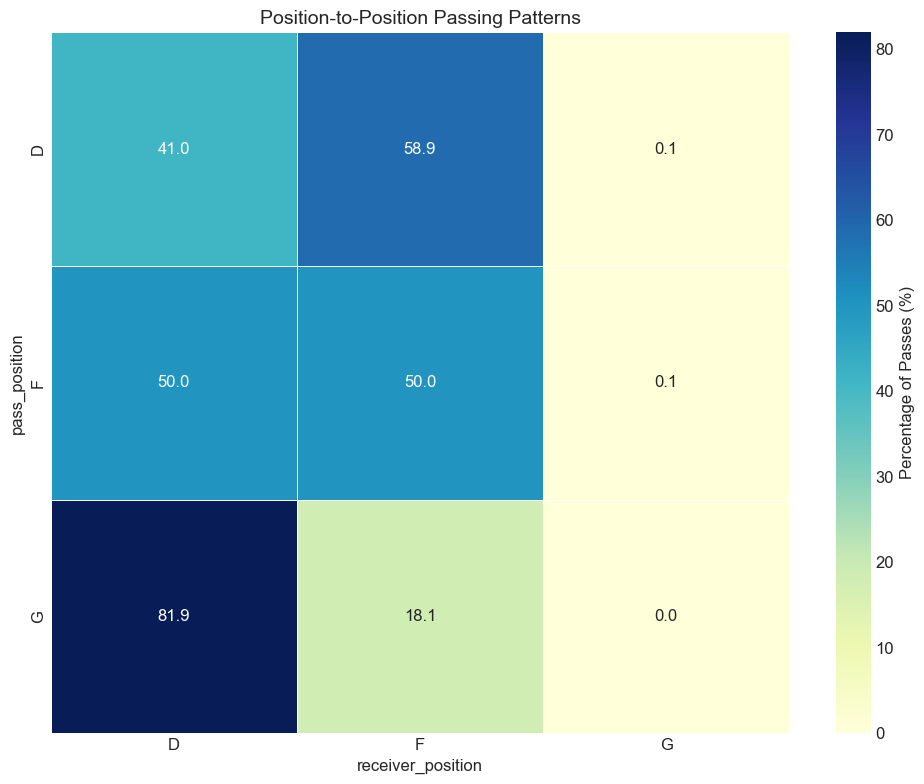

Position passing diagram saved to passing_network_results/position_passing_diagram.png


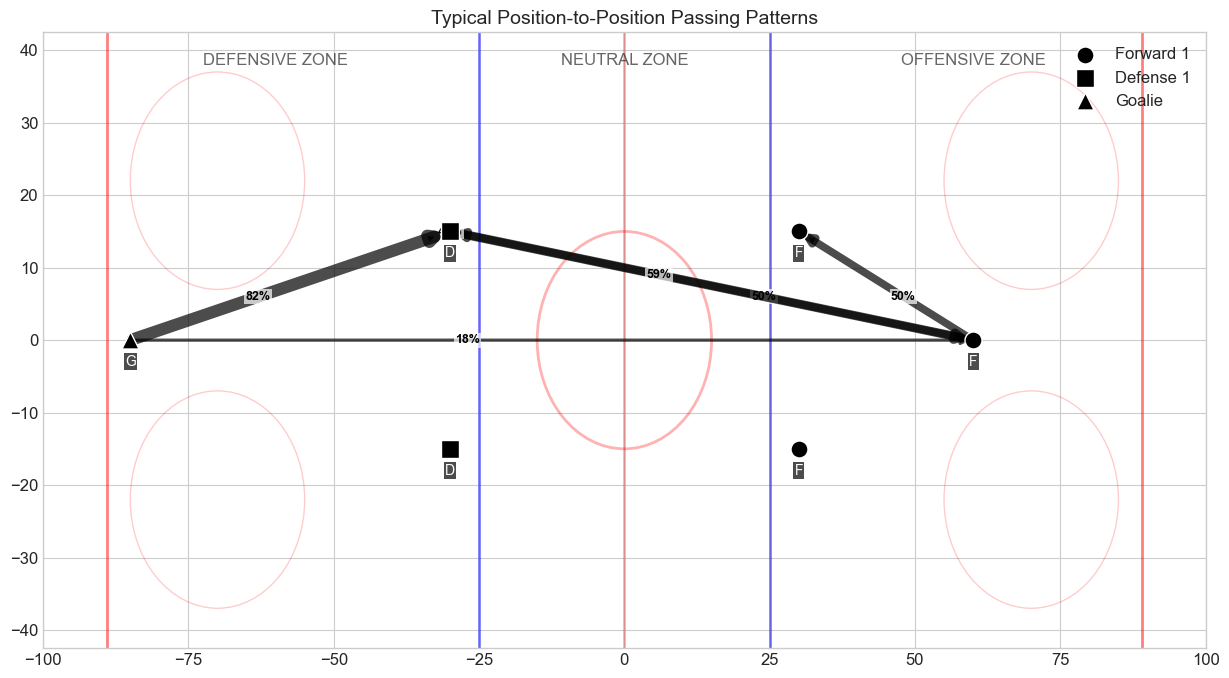


============================ PASS SEQUENCE ANALYSIS ============================

Total sequences: 1946
Average sequence length: 1.56 passes
Median sequence length: 1.0 passes
Maximum sequence length: 9 passes

Sequence length distribution:
  1 pass: 1245 sequences (64.0%)
  2 passes: 462 sequences (23.7%)
  3 passes: 148 sequences (7.6%)
  4 passes: 56 sequences (2.9%)
  5 passes: 21 sequences (1.1%)
  6 passes: 7 sequences (0.4%)
  7 passes: 4 sequences (0.2%)
  8 passes: 2 sequences (0.1%)
  9 passes: 1 sequences (0.1%)
Sequence length distribution saved to passing_network_results/sequence_length_distribution.png


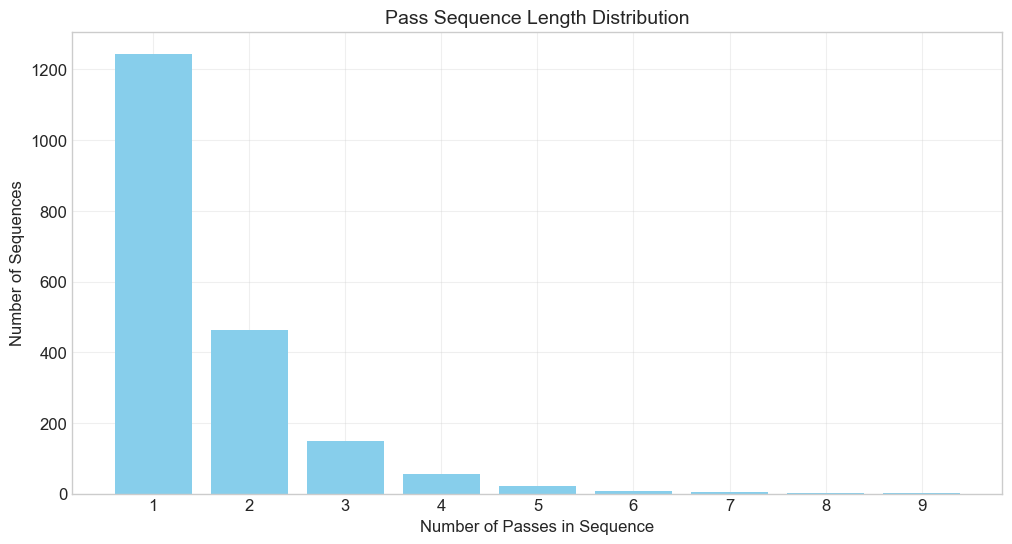


Visualizing sequence #1 with 9 passes
Game ID: 74544, Team: 524
Sequence visualization saved to passing_network_results/sequence_1_visualization.png


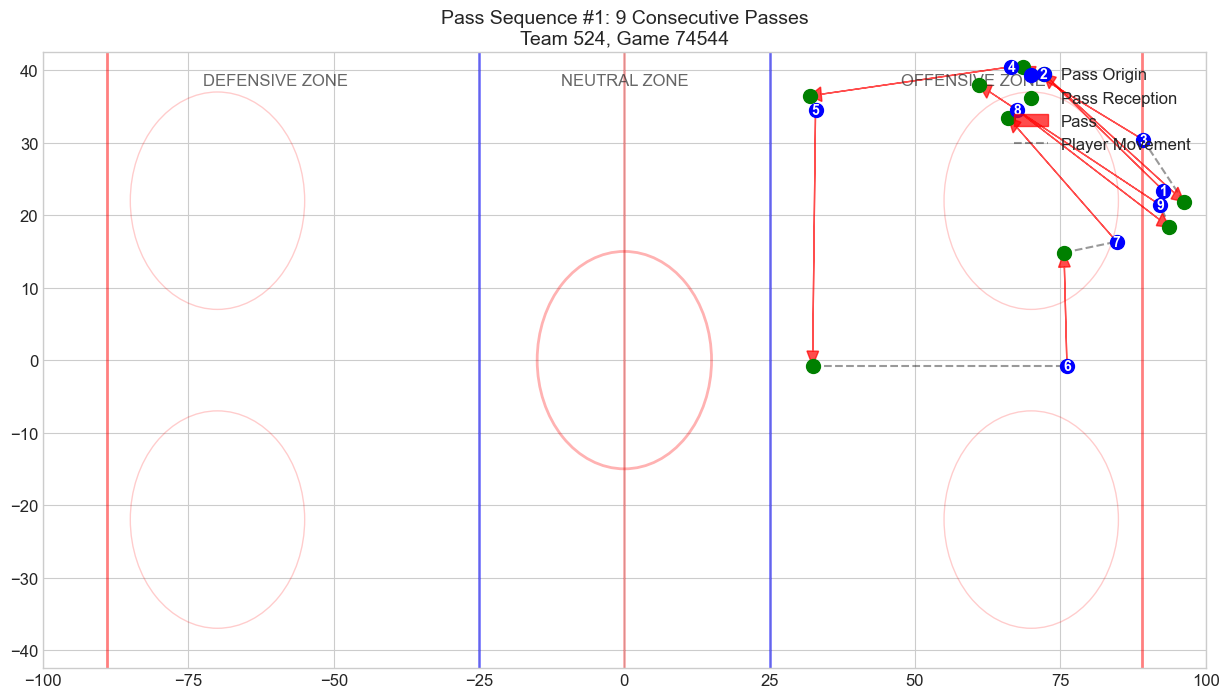


Visualizing sequence #2 with 8 passes
Game ID: 74544, Team: 628
Sequence visualization saved to passing_network_results/sequence_2_visualization.png


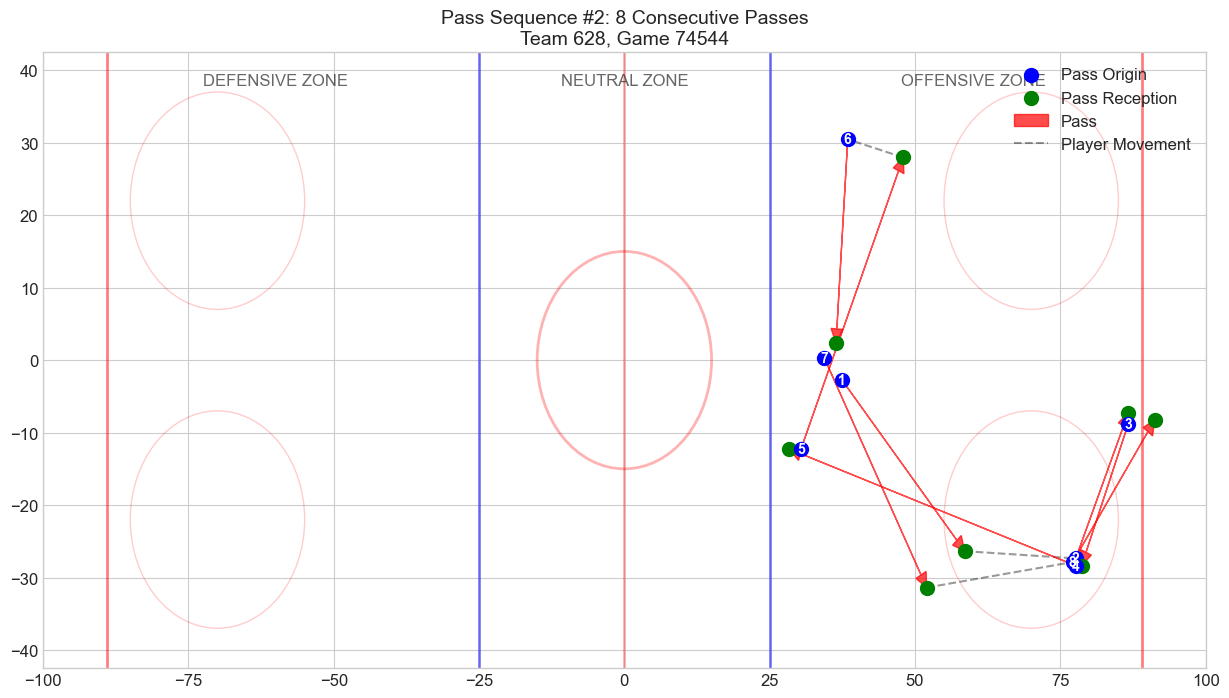


Visualizing sequence #3 with 8 passes
Game ID: 80975, Team: 503
Sequence visualization saved to passing_network_results/sequence_3_visualization.png


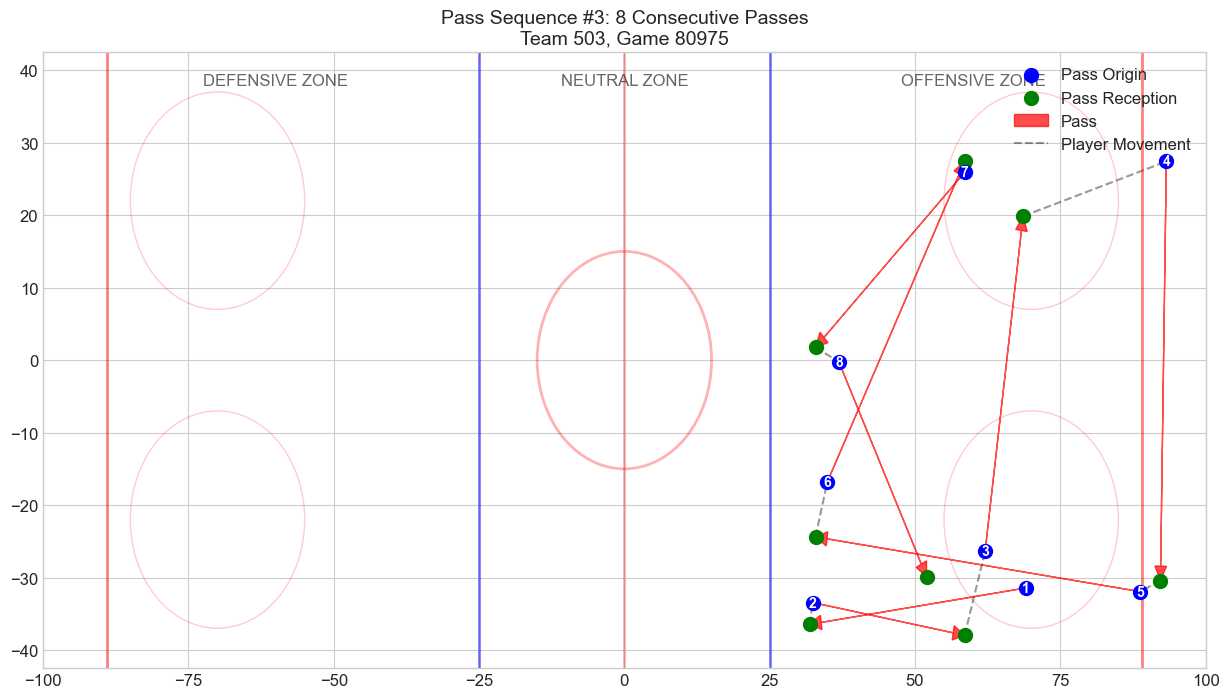


========================== PASSING BY GAME SITUATION ===========================

Number of passes by score differential:
score_diff
-3     92
-2    276
-1    933
 0    694
 1    626
 2    316
 3    100
Name: count, dtype: int64
Zone transitions by score differential saved to passing_network_results/zone_transitions_by_score.png


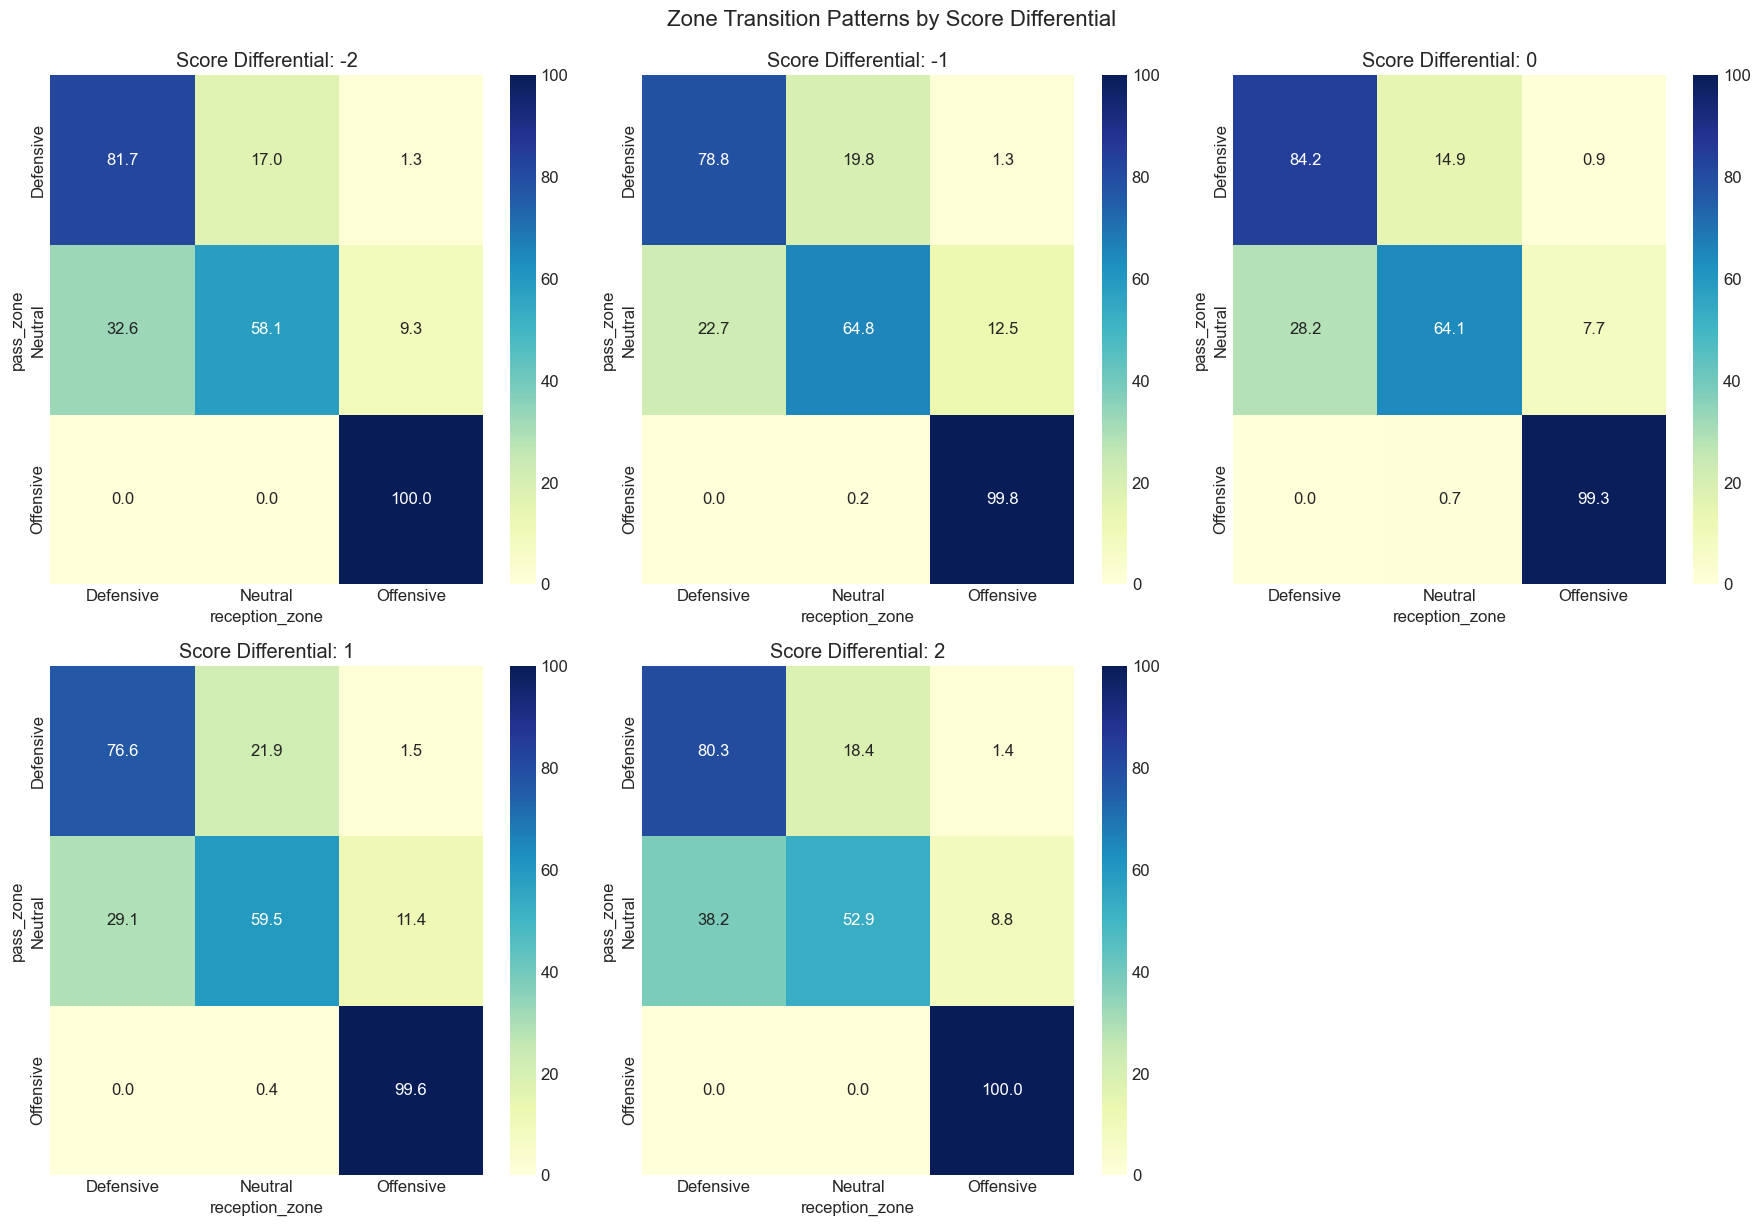


Number of passes by manpower situation:
manpower
evenStrength    2575
powerPlay        439
shortHanded       23
Name: count, dtype: int64
Zone transitions by manpower situation saved to passing_network_results/zone_transitions_by_manpower.png


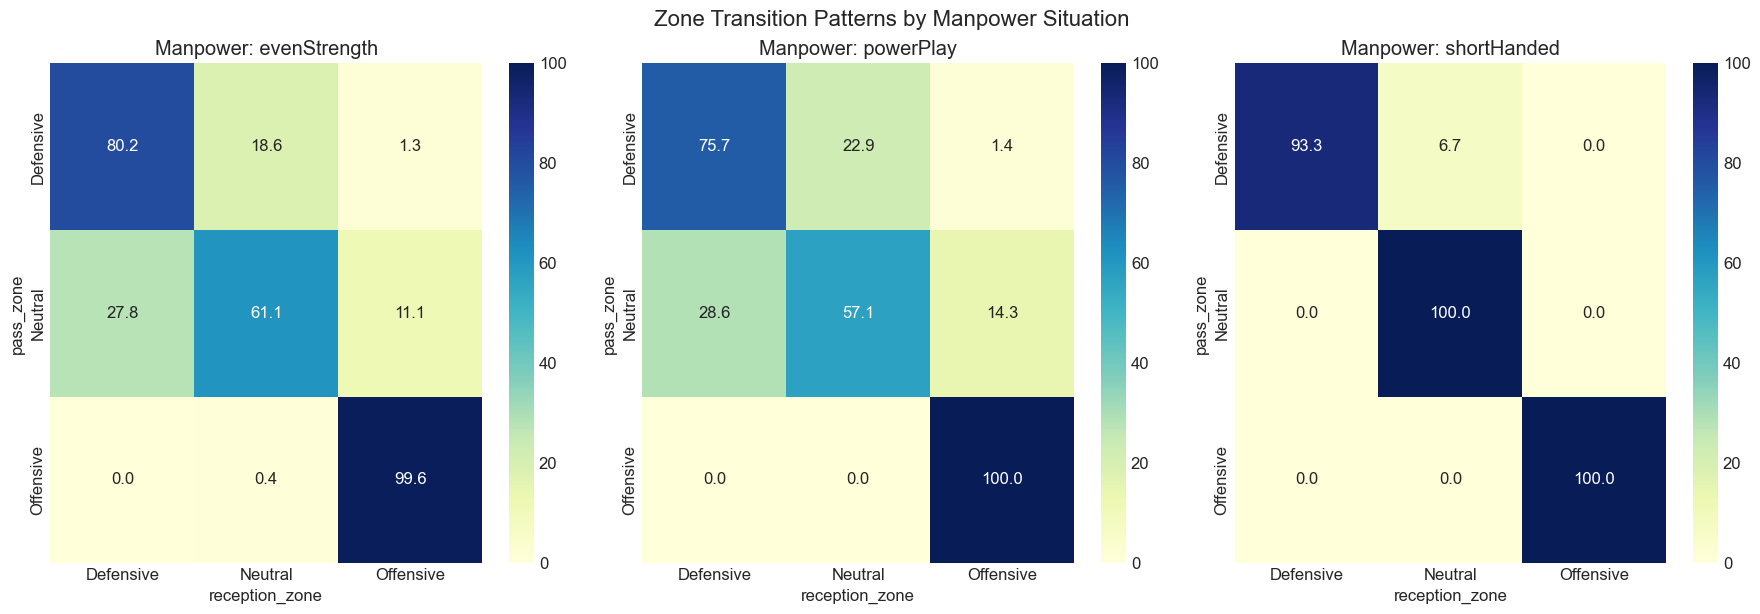


=========================== SUMMARY AND CONCLUSIONS ============================

Analysis summary saved to passing_network_results/passing_analysis_summary.txt

Passing Network Analysis Complete!
All results and visualizations have been saved to the 'passing_network_results' directory


In [7]:
# ==========================================================================
# 7. PLAYER POSITION PASSING ANALYSIS
# ==========================================================================

print_section("PLAYER POSITION PASSING ANALYSIS")

def analyze_position_passing(connections):
    """
    Analyze passing patterns between player positions
    """
    # Create position passing matrix
    pos_matrix = pd.crosstab(
        connections['pass_position'],
        connections['receiver_position'],
        margins=True,
        margins_name='Total'
    )
    
    # Create percentage matrix
    pos_pct = pd.crosstab(
        connections['pass_position'],
        connections['receiver_position'],
        normalize='index'
    ) * 100
    
    print("Position-to-Position Pass Counts:")
    print(pos_matrix)
    
    print("\nPosition-to-Position Pass Percentages (row %):")
    print(pos_pct.round(1))
    
    # Visualize
    plt.figure(figsize=(10, 8))
    
    # Use the percentage matrix without the Total row/column
    heatmap_data = pos_pct.fillna(0)
    
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='.1f',
        cmap='YlGnBu',
        linewidths=0.5,
        cbar_kws={'label': 'Percentage of Passes (%)'}
    )
    
    plt.title('Position-to-Position Passing Patterns', fontsize=14)
    plt.tight_layout()
    
    # Save the figure
    filename = f"{output_dir}/position_passing_heatmap.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Position passing heatmap saved to {filename}")
    plt.show()
    
    # Also create a visualization on the rink showing typical position passing
    plt.figure(figsize=(15, 8))
    ax = plt.gca()
    
    # Draw the hockey rink
    plot_hockey_rink(ax)
    
    # Define position locations (approximate)
    position_locations = {
        'F': [(60, 0), (30, 15), (30, -15)],  # Forwards at different positions
        'D': [(-30, 15), (-30, -15)],  # Defensemen
        'G': [(-85, 0)]  # Goalie
    }
    
    # Plot position markers
    for pos, locations in position_locations.items():
        for i, (x, y) in enumerate(locations):
            # Plot the position
            if pos == 'F':
                marker = 'o'
                label = f"Forward {i+1}" if i == 0 else None
            elif pos == 'D':
                marker = 's'
                label = f"Defense {i+1}" if i == 0 else None
            else:
                marker = '^'
                label = "Goalie"
            
            ax.scatter(x, y, s=150, marker=marker, color='black', edgecolor='white', 
                      label=label, zorder=10)
            ax.text(x, y-3, pos, fontsize=10, ha='center', va='center', color='white', 
                   bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', pad=1),
                   zorder=11)
    
    # Draw arrows between positions based on percentage data
    for sender in ['F', 'D', 'G']:
        for receiver in ['F', 'D', 'G']:
            # Skip if percentages are not available
            if sender not in pos_pct.index or receiver not in pos_pct.columns:
                continue
                
            # Get percentage
            pct = pos_pct.loc[sender, receiver]
            
            # Skip very small percentages
            if pct < 5:
                continue
                
            # Select positions to connect
            if sender == 'F':
                # For forwards, choose random forward positions
                sender_positions = position_locations['F']
                sender_pos = sender_positions[0]  # Use the center forward
            else:
                sender_positions = position_locations[sender]
                sender_pos = sender_positions[0]  # Use first position for simplicity
                
            if receiver == 'F':
                receiver_positions = position_locations['F']
                # For F-to-F passes, choose a different forward
                if sender == 'F':
                    receiver_pos = receiver_positions[1]  # Use a different forward position
                else:
                    receiver_pos = receiver_positions[0]  # Use center forward
            else:
                receiver_positions = position_locations[receiver]
                receiver_pos = receiver_positions[0]
            
            # Draw the arrow
            width = 0.5 + (pct / 10)  # Adjust width based on percentage
            
            # Calculate arrow properties
            dx = receiver_pos[0] - sender_pos[0]
            dy = receiver_pos[1] - sender_pos[1]
            
            # Draw the arrow
            ax.annotate(
                '',
                xy=receiver_pos,  # End point
                xytext=sender_pos,  # Start point
                arrowprops=dict(
                    arrowstyle='-|>',
                    color='black',
                    lw=width,
                    alpha=0.7
                )
            )
            
            # Add percentage label near the arrow
            mid_x = sender_pos[0] + dx * 0.4
            mid_y = sender_pos[1] + dy * 0.4
            ax.text(mid_x, mid_y, f"{pct:.0f}%", ha='center', va='center',
                   fontsize=9, fontweight='bold', color='black',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    
    # Add a legend
    ax.legend(loc='upper right')
    
    plt.title('Typical Position-to-Position Passing Patterns', fontsize=14)
    
    # Save the figure
    filename = f"{output_dir}/position_passing_diagram.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Position passing diagram saved to {filename}")
    plt.show()
    
    return pos_matrix, pos_pct

# Analyze position-to-position passing
pos_matrix, pos_pct = analyze_position_passing(connections)

# ==========================================================================
# 8. PASS SEQUENCE ANALYSIS
# ==========================================================================

print_section("PASS SEQUENCE ANALYSIS")

def identify_pass_sequences(connections, max_time_gap=3.0):
    """
    Group passes into sequences based on time gaps.
    A new sequence starts when the time gap between consecutive passes exceeds max_time_gap.
    
    Parameters:
    -----------
    connections : DataFrame
        The pass connections data
    max_time_gap : float
        Maximum time gap (in seconds) between consecutive passes in the same sequence
        
    Returns:
    --------
    list of lists, where each inner list contains pass connections in a sequence
    """
    # Sort connections by game, team, and time
    sorted_connections = connections.sort_values(['gameid', 'sender_team', 'pass_time'])
    
    # Initialize sequence tracking
    sequences = []
    current_sequence = []
    current_game = None
    current_team = None
    last_pass_time = None
    
    # Process each connection
    for _, conn in sorted_connections.iterrows():
        # Check if this starts a new sequence
        new_sequence = (
            current_game != conn['gameid'] or 
            current_team != conn['sender_team'] or
            (last_pass_time is not None and conn['pass_time'] - last_pass_time > max_time_gap)
        )
        
        if new_sequence and current_sequence:
            # Save the current sequence and start a new one
            sequences.append(current_sequence)
            current_sequence = []
        
        # Add this pass to the current sequence
        current_sequence.append(conn)
        
        # Update tracking variables
        current_game = conn['gameid']
        current_team = conn['sender_team']
        last_pass_time = conn['pass_time']
    
    # Add the final sequence if it exists
    if current_sequence:
        sequences.append(current_sequence)
    
    return sequences

def analyze_pass_sequences(sequences):
    """
    Analyze passing sequences to find patterns and statistics
    """
    if not sequences:
        print("No sequences to analyze")
        return
    
    # Calculate sequence lengths
    sequence_lengths = [len(seq) for seq in sequences]
    
    # Basic statistics
    avg_length = np.mean(sequence_lengths)
    median_length = np.median(sequence_lengths)
    max_length = max(sequence_lengths)
    
    print(f"Total sequences: {len(sequences)}")
    print(f"Average sequence length: {avg_length:.2f} passes")
    print(f"Median sequence length: {median_length} passes")
    print(f"Maximum sequence length: {max_length} passes")
    
    # Distribution of sequence lengths
    length_counts = pd.Series(sequence_lengths).value_counts().sort_index()
    
    print("\nSequence length distribution:")
    for length, count in length_counts.items():
        print(f"  {length} pass{'es' if length != 1 else ''}: {count} sequences ({count/len(sequences)*100:.1f}%)")
    
    # Plot the distribution
    plt.figure(figsize=(12, 6))
    
    # Plot as a bar chart
    plt.bar(length_counts.index, length_counts.values, color='skyblue')
    
    plt.title('Pass Sequence Length Distribution', fontsize=14)
    plt.xlabel('Number of Passes in Sequence', fontsize=12)
    plt.ylabel('Number of Sequences', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, int(max_length) + 1))
    
    # Save the figure
    filename = f"{output_dir}/sequence_length_distribution.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Sequence length distribution saved to {filename}")
    plt.show()
    
    # Find and visualize a few of the longest sequences
    longest_sequences = sorted(sequences, key=len, reverse=True)[:3]
    
    for i, sequence in enumerate(longest_sequences):
        visualize_sequence(sequence, i+1)
    
def visualize_sequence(sequence, seq_num):
    """
    Visualize a passing sequence on a hockey rink
    """
    seq_length = len(sequence)
    
    print(f"\nVisualizing sequence #{seq_num} with {seq_length} passes")
    print(f"Game ID: {sequence[0]['gameid']}, Team: {sequence[0]['sender_team']}")
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Draw the hockey rink
    plot_hockey_rink(ax)
    
    # Plot each pass in the sequence
    for i, pass_conn in enumerate(sequence):
        # Plot the origin point
        ax.scatter(
            pass_conn['pass_x'], 
            pass_conn['pass_y'], 
            color='blue', 
            s=100, 
            zorder=3,
            label='Pass Origin' if i == 0 else None
        )
        
        # Plot the reception point
        ax.scatter(
            pass_conn['reception_x'], 
            pass_conn['reception_y'], 
            color='green', 
            s=100, 
            zorder=3,
            label='Pass Reception' if i == 0 else None
        )
        
        # Add a number label
        ax.text(
            pass_conn['pass_x'], 
            pass_conn['pass_y'], 
            str(i+1), 
            fontsize=10, 
            ha='center', 
            va='center', 
            color='white', 
            fontweight='bold',
            zorder=4
        )
        
        # Draw the pass arrow
        ax.arrow(
            pass_conn['pass_x'], 
            pass_conn['pass_y'],
            pass_conn['reception_x'] - pass_conn['pass_x'], 
            pass_conn['reception_y'] - pass_conn['pass_y'],
            head_width=2, 
            head_length=2, 
            fc='red', 
            ec='red', 
            length_includes_head=True,
            zorder=2,
            alpha=0.7,
            label='Pass' if i == 0 else None
        )
        
        # If not the last pass, connect to the next one with a dotted line
        if i < len(sequence) - 1:
            next_pass = sequence[i+1]
            ax.plot(
                [pass_conn['reception_x'], next_pass['pass_x']], 
                [pass_conn['reception_y'], next_pass['pass_y']],
                'k--', 
                alpha=0.4,
                zorder=1,
                label='Player Movement' if i == 0 else None
            )
    
    # Add title
    plt.title(
        f"Pass Sequence #{seq_num}: {seq_length} Consecutive Passes\n" +
        f"Team {sequence[0]['sender_team']}, Game {sequence[0]['gameid']}", 
        fontsize=14
    )
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Save the figure
    filename = f"{output_dir}/sequence_{seq_num}_visualization.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Sequence visualization saved to {filename}")
    plt.show()

# Identify and analyze pass sequences
sequences = identify_pass_sequences(connections)
analyze_pass_sequences(sequences)

# ==========================================================================
# 9. PASSING BY GAME SITUATION (SCORE, MANPOWER)
# ==========================================================================

print_section("PASSING BY GAME SITUATION")

def analyze_situational_passing(connections):
    """
    Analyze how passing patterns change in different game situations
    """
    # Score differential analysis
    score_diff_counts = connections['score_diff'].value_counts().sort_index()
    
    print("Number of passes by score differential:")
    print(score_diff_counts)
    
    # Zone transitions by score differential
    score_zone_transitions = {}
    
    for diff in score_diff_counts.index:
        # Filter connections for this score differential
        diff_connections = connections[connections['score_diff'] == diff]
        
        # Calculate zone transition percentages
        zone_pct = pd.crosstab(
            diff_connections['pass_zone'],
            diff_connections['reception_zone'],
            normalize='index'
        ) * 100
        
        score_zone_transitions[diff] = zone_pct
    
    # Find the most common score differentials (e.g., top 5)
    top_diffs = score_diff_counts.nlargest(5).index
    
    # Plot zone transition patterns for these score differentials
    plt.figure(figsize=(18, 12))
    
    for i, diff in enumerate(sorted(top_diffs)):
        # Create subplot
        ax = plt.subplot(2, 3, i+1)
        
        # Get data
        if diff in score_zone_transitions:
            data = score_zone_transitions[diff]
            
            # Create heatmap
            sns.heatmap(
                data,
                annot=True,
                fmt='.1f',
                cmap='YlGnBu',
                vmin=0,
                vmax=100,
                ax=ax
            )
            
            ax.set_title(f"Score Differential: {diff}")
    
    plt.tight_layout()
    plt.suptitle("Zone Transition Patterns by Score Differential", fontsize=16, y=1.02)
    
    # Save the figure
    filename = f"{output_dir}/zone_transitions_by_score.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Zone transitions by score differential saved to {filename}")
    plt.show()
    
    # Manpower situation analysis
    manpower_counts = connections['manpower'].value_counts()
    
    print("\nNumber of passes by manpower situation:")
    print(manpower_counts)
    
    # Zone transitions by manpower situation
    manpower_zone_transitions = {}
    
    for situation in manpower_counts.index:
        # Filter connections for this manpower situation
        situation_connections = connections[connections['manpower'] == situation]
        
        # Calculate zone transition percentages
        zone_pct = pd.crosstab(
            situation_connections['pass_zone'],
            situation_connections['reception_zone'],
            normalize='index'
        ) * 100
        
        manpower_zone_transitions[situation] = zone_pct
    
    # Plot zone transition patterns for manpower situations
    plt.figure(figsize=(18, 6))
    
    for i, situation in enumerate(manpower_counts.index):
        # Create subplot
        ax = plt.subplot(1, 3, i+1)
        
        # Get data
        if situation in manpower_zone_transitions:
            data = manpower_zone_transitions[situation]
            
            # Create heatmap
            sns.heatmap(
                data,
                annot=True,
                fmt='.1f',
                cmap='YlGnBu',
                vmin=0,
                vmax=100,
                ax=ax
            )
            
            ax.set_title(f"Manpower: {situation}")
    
    plt.tight_layout()
    plt.suptitle("Zone Transition Patterns by Manpower Situation", fontsize=16, y=1.02)
    
    # Save the figure
    filename = f"{output_dir}/zone_transitions_by_manpower.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Zone transitions by manpower situation saved to {filename}")
    plt.show()

# Analyze passing by game situation
analyze_situational_passing(connections)

# ==========================================================================
# 10. SUMMARY AND CONCLUSIONS
# ==========================================================================

print_section("SUMMARY AND CONCLUSIONS")

# Generate a summary file with observations and insights
with open(f"{output_dir}/passing_analysis_summary.txt", 'w') as f:
    f.write("HOCKEY PASSING NETWORK ANALYSIS SUMMARY\n")
    f.write("=======================================\n\n")
    
    f.write("DATASET OVERVIEW:\n")
    f.write(f"- Analyzed {len(connections)} pass connections across {connections['gameid'].nunique()} games\n")
    f.write(f"- Average time between pass and reception: {connections['time_diff'].mean():.2f} seconds\n\n")
    
    f.write("KEY FINDINGS:\n")
    f.write("1. TEAM PASSING NETWORKS:\n")
    f.write("   - Individual team networks have been generated showing key connectors\n")
    f.write("   - Player metrics calculated for each team identifying playmakers and outlets\n\n")
    
    f.write("2. ZONE ANALYSIS:\n")
    zone_stats = pd.crosstab(connections['pass_zone'], connections['reception_zone'], normalize='index') * 100
    for zone in ['Defensive', 'Neutral', 'Offensive']:
        if zone in zone_stats.index:
            f.write(f"   - {zone} Zone Passes: ")
            for dest in ['Defensive', 'Neutral', 'Offensive']:
                if dest in zone_stats.columns:
                    f.write(f"{dest}: {zone_stats.loc[zone, dest]:.1f}%, ")
            f.write("\n")
    f.write("\n")
    
    f.write("3. POSITIONAL ANALYSIS:\n")
    pos_stats = pd.crosstab(connections['pass_position'], connections['receiver_position'], normalize='index') * 100
    for pos in pos_stats.index:
        f.write(f"   - {pos} passing tendencies: ")
        for dest in pos_stats.columns:
            f.write(f"to {dest}: {pos_stats.loc[pos, dest]:.1f}%, ")
        f.write("\n")
    f.write("\n")
    
    f.write("4. SEQUENCE ANALYSIS:\n")
    if sequences:
        seq_lengths = [len(seq) for seq in sequences]
        f.write(f"   - Identified {len(sequences)} passing sequences\n")
        f.write(f"   - Average sequence length: {np.mean(seq_lengths):.2f} passes\n")
        f.write(f"   - Maximum sequence length: {max(seq_lengths)} passes\n")
        f.write(f"   - Most common sequence length: {pd.Series(seq_lengths).value_counts().idxmax()} passes\n\n")
    
    f.write("5. SITUATIONAL ANALYSIS:\n")
    f.write("   - Score and manpower situations show distinct passing patterns\n")
    f.write("   - Zone transitions vary based on game situation\n\n")
    
    f.write("RECOMMENDATIONS FOR FURTHER ANALYSIS:\n")
    f.write("1. Integrate with shot and scoring data to identify successful passing patterns\n")
    f.write("2. Compare passing networks across teams to identify stylistic differences\n")
    f.write("3. Analyze temporal changes in passing patterns during games\n")
    f.write("4. Examine passing networks in specific game situations (e.g., late game, when trailing)\n")
    f.write("5. Incorporate player tracking data for more precise positioning analysis\n")

print(f"Analysis summary saved to {output_dir}/passing_analysis_summary.txt")

print("\nPassing Network Analysis Complete!")
print(f"All results and visualizations have been saved to the '{output_dir}' directory")